In [67]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import opendatasets as os
import matplotlib.pyplot as plt

In [68]:
os.download("https://raw.githubusercontent.com/dineshpiyasamara/deep_learning_tutorial/refs/heads/master/01.tf_with_regression/dataset.csv")

Using downloaded and verified file: .\dataset.csv


In [69]:
data = pd.read_csv('dataset.csv')
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [70]:
X = data['x']
Y= data['y']

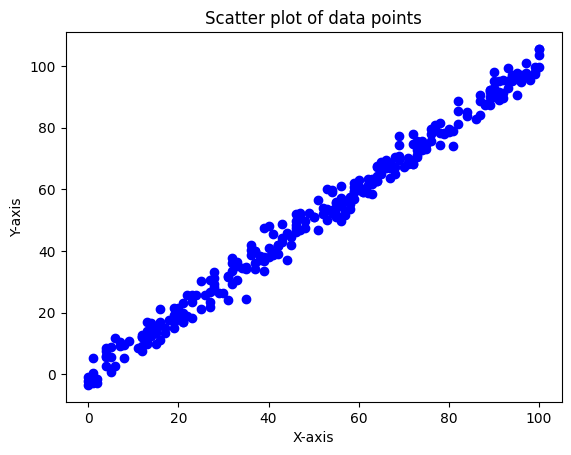

In [71]:
plt.scatter(X, Y,c='b')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')    
plt.title('Scatter plot of data points')
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Model Building

#### Create a Model

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    loss='mae',                     # or tf.keras.losses.MeanAbsoluteError()
    metrics=['mae']
)

# Train the model
epochs_number = 10
history=model.fit(tf.expand_dims(x_train, axis=1), y_train, epochs=epochs_number)


Epoch 1/10


d:\DL\env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 17.3978 - mae: 17.3978
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.2404 - mae: 7.2404 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.0388 - mae: 4.0388 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1799 - mae: 3.1799 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6195 - mae: 3.6195 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2838 - mae: 3.2838 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9623 - mae: 3.9623 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8677 - mae: 2.8677 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.8101 - mae: 2.8101
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8608 - mae: 2.8608 


In [74]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.26 KB)

 Trainable params: 789 (3.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,580 (6.18 KB)

In [75]:
y_prediction =model.predict(x_test)
y_prediction[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step 


array([[89.9568   ],
       [75.95558  ],
       [93.957146 ],
       [ 4.9494047],
       [90.95689  ]], dtype=float32)

In [76]:
y_test[:5]

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

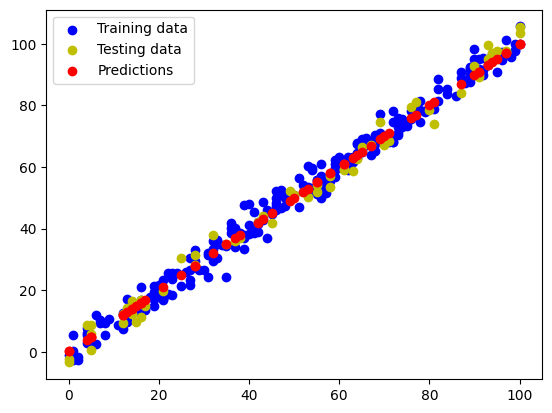

In [77]:
plt.scatter(x_train,y_train,c='b',label='Training data')
plt.scatter(x_test,y_test,c='y',label='Testing data')
plt.scatter(x_test,y_prediction,c='r',label='Predictions')
plt.legend()
plt.show()

In [78]:
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.5184 - mae: 2.5184 


[2.5184178352355957, 2.5184178352355957]

In [79]:
# Using  MAE (Mean Absolute Error)
# mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_prediction))

In [80]:
y_prediction.shape # two dimensional shape

(60, 1)

In [81]:
y_test.shape # one dimensional shape

(60,)

In [82]:
mse = tf.keras.losses.MeanSquaredError()(y_test, tf.squeeze(y_prediction))
print("MSE:", mse.numpy())
 

MSE: 9.48491


In [84]:
history.history

{'loss': [17.397785186767578,
  7.2403998374938965,
  4.038805961608887,
  3.179903745651245,
  3.61950945854187,
  3.2838294506073,
  3.96226167678833,
  2.8677406311035156,
  2.8100521564483643,
  2.8608078956604004],
 'mae': [17.397785186767578,
  7.2403998374938965,
  4.038805961608887,
  3.179903745651245,
  3.61950945854187,
  3.2838294506073,
  3.96226167678833,
  2.8677406311035156,
  2.8100521564483643,
  2.8608078956604004]}

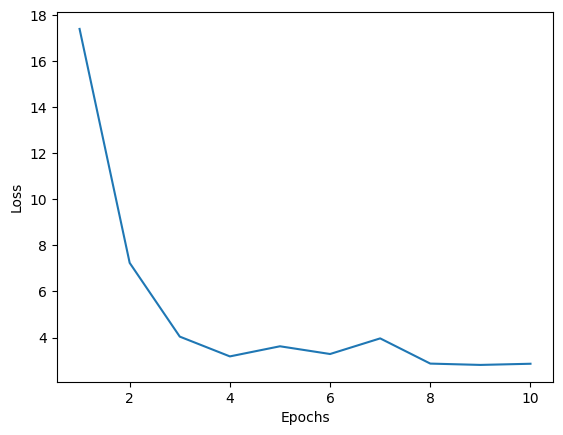

In [85]:
x_range=range(1,epochs_number+1)
loss=history.history['loss']
plt.plot(x_range,loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')  
plt.show()

In [87]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases=layer.get_weights()[1]
    print(f"\nWeights:\n{weights} \nBiases:\n{biases}")


Weights:
[[-0.06959021 -0.21007878 -0.05416068 -0.16047981 -0.01049906  0.36106738
   0.06779689 -0.15139759 -0.08725725 -0.18541457  0.30433786 -0.18294382
  -0.06859773 -0.0201782   0.307864   -0.10137069 -0.16721064 -0.3360772
  -0.18150073 -0.13868847 -0.1076306  -0.12058853 -0.15878993  0.4357344
  -0.20829552 -0.31425714  0.16850175 -0.09864409  0.35750046 -0.2687751
  -0.23999155 -0.19582413  0.18399732 -0.25681657 -0.28069785  0.03707156
  -0.11468209 -0.06484315 -0.25952688 -0.07153657 -0.27067474 -0.2808455
  -0.18313709 -0.09628953  0.06422549 -0.20216891  0.39598686  0.30250475
  -0.24793386 -0.21262175 -0.08024487 -0.18748926 -0.01794916 -0.26852942
  -0.17133789 -0.0439947  -0.1264472  -0.15531933 -0.20437254 -0.13218108
  -0.21014592  0.31927997  0.13457344 -0.14569847]] 
Biases:
[ 0.          0.          0.          0.          0.         -0.04963674
 -0.06562623 -0.42593586  0.          0.         -0.06697642  0.
 -0.26672852  0.         -0.03322042  0.          0.   